# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 10.10.2022

Жесткий дедлайн: 23:59MSK 18.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 323.7 kB/s eta 0:00:00a 0:00:01


In [5]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/tfhyzqbmi5yzj3y/train-2.csv?dl=0'

zsh:1: command not found: wget


In [5]:
data_train = pd.read_csv("train.csv")
data_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
data_train.shape

(1458644, 11)

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [7]:
data_train = data_train.drop(columns=['dropoff_datetime'])
data_train['pickup_datetime'] = pd.to_datetime(data_train['pickup_datetime'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


In [8]:
data_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [ ]:
y = data_train['trip_duration']
sns.distplot(y)

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Судя по гистограмме, у нас есть выбросы значений, что может помешать нам, если наша функция потерь слишком чувствительна к выбросам

В соревновании в качестве метрики качества использовалось RMSLE:

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMLSE более устойчива к выбросам и несет более крупный штраф за недооценку фактической стоимости. Это особенно полезно для бизнес-случаний, когда недооценка целевой переменной неприемлема, но завышение может быть допущена.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 

$a(x_i) = \exp(\hat{a}(x_i)) - 1$ = $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, $\hat{y}_i = \log{(y_i + 1)}$ = $\log{(\exp({a}(x_i)) - 1 + 1)} = {a}(x_i)$

Аналогично для $\hat{a}(x_i)$:

$\hat{a}(x_i) = \exp({a}(x_i)) - 1 = \log{(\exp(\hat{a}(x_i)) - 1 + 1)} = \hat{a}(x_i)$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

/var/folders/qg/bhrjqlw5373cm3pjz7y0yntc0000gn/T/ipykernel_95037/1597298101.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['log_trip_duration'])


<Axes: xlabel='log_trip_duration', ylabel='Density'>

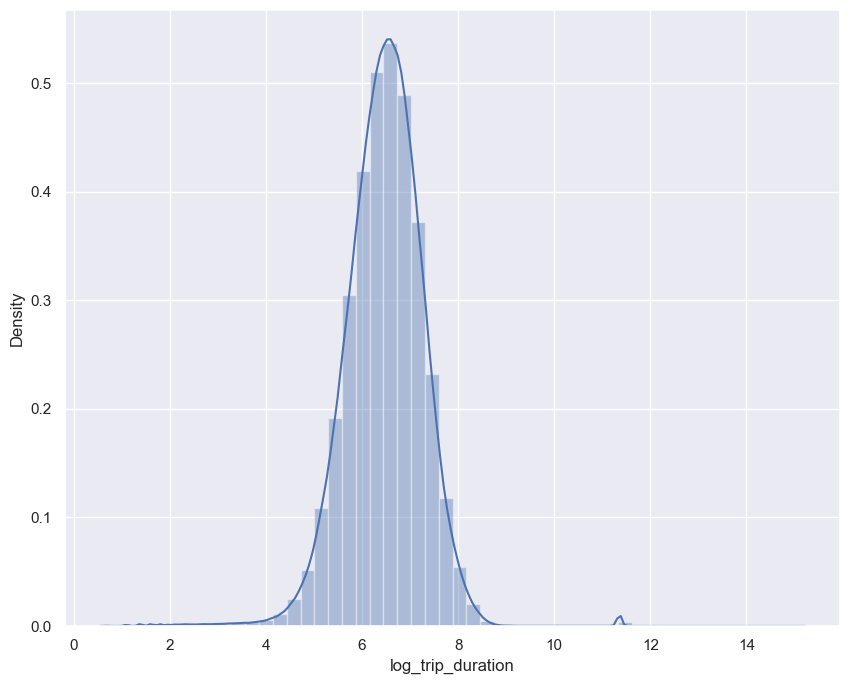

In [12]:
data_train['log_trip_duration'] = np.log1p(data_train['trip_duration'].values)
sns.distplot(data_train['log_trip_duration'])


получили более менее нормальное распределение c некоторым выбрасом, продолжительность поездки всегда находится в одном и том же интервале

In [13]:
# удаляем колонку со старым таргетом так:
data_train.drop(columns=['trip_duration'])
# inplace=False потому что мне еще понадобится в будущем этот столбец

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [1]:
plt.figure(figsize=(26,8))

sns.countplot(x=data_train['pickup_datetime'].dt.date)

plt.xlabel('day of year')
plt.ylabel('count of trip')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

NameError: name 'plt' is not defined

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [15]:
data_train['pickup_datetime'].dt.date.value_counts()[-2:]

2016-01-24    3383
2016-01-23    1648
Name: pickup_datetime, dtype: int64

Снежная буря в Соединенных Штатах в январе 2016 года была снежной бурей, которая произвела до 3 футов (91 см) снега в некоторых частях Срединно-Атлантического Океана и Северо-восточной части Соединенных Штатов с 22 по 24 января 2016 года.

Text(0.5, 1.0, 'dependence')

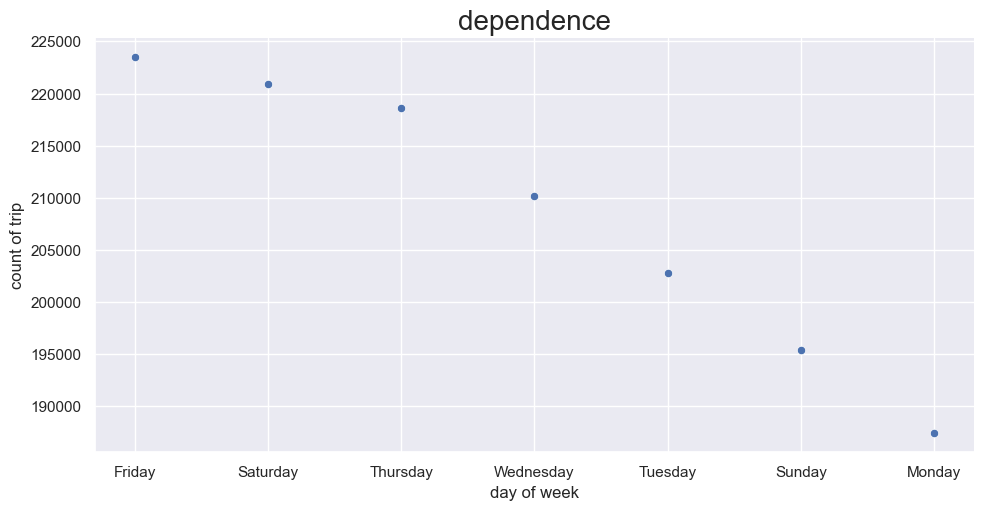

In [16]:
x = data_train['pickup_datetime'].dt.day_name().value_counts().index
y = data_train['pickup_datetime'].dt.day_name().value_counts()

sns.relplot(x = x, y = y, aspect=2, kind = 'scatter')

plt.xlabel('day of week')
plt.ylabel('count of trip')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

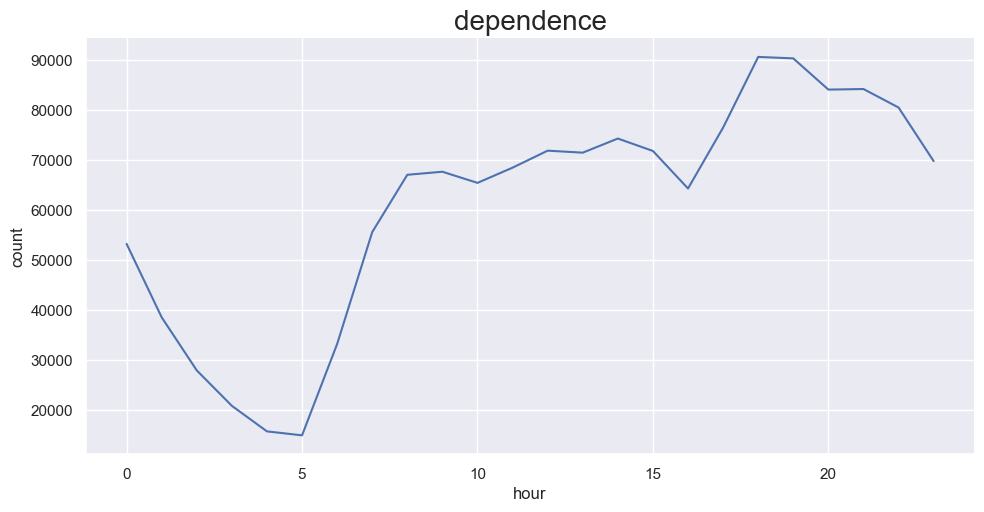

In [17]:
x = data_train['pickup_datetime'].dt.hour.value_counts().index
y = data_train['pickup_datetime'].dt.hour.value_counts()
sns.relplot(x = x, y = y, aspect=2, kind='line')

plt.xlabel('hour')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [18]:
# создадим дополнительные столбцы
data_train['hour'] = data_train['pickup_datetime'].dt.hour
data_train['month'] = data_train['pickup_datetime'].dt.month
data_train['day_of_week'] = data_train['pickup_datetime'].dt.day_name()
data_train['day_of_year'] = data_train['pickup_datetime'].dt.date
data_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,month,day_of_week,day_of_year
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,3,Monday,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,6,Sunday,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,1,Tuesday,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,4,Wednesday,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,3,Saturday,2016-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,13,4,Friday,2016-04-08
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,7,1,Sunday,2016-01-10
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,6,4,Friday,2016-04-22
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,15,1,Tuesday,2016-01-05


In [19]:
task_3 = pd.DataFrame(data_train[['month','hour', 'day_of_week']])
task_3

,month,hour,day_of_week
0,3,17,Monday
1,6,0,Sunday
2,1,11,Tuesday
3,4,19,Wednesday
4,3,13,Saturday
...,...,...,...
1458639,4,13,Friday
1458640,1,7,Sunday
1458641,4,6,Friday
1458642,1,15,Tuesday


In [20]:
task_3.groupby(['day_of_week', 'hour']).count()

month
day_of_week hour       
Friday      0      8779
            1      5804
            2      3949
            3      2924
            4      2313
...                 ...
Wednesday   19    13693
            20    13183
            21    13438
            22    12407
            23     9735

[168 rows x 1 columns]

Text(0.5, 1.0, 'зависимость количества поездок от часа в сутках для разных месяцев')

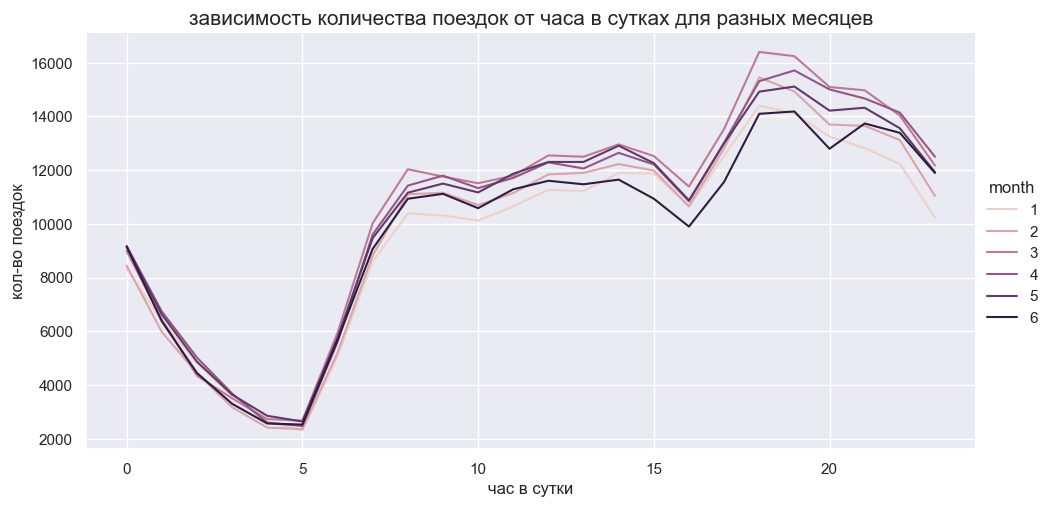

In [21]:
sns.relplot(hue = 'month', x = 'hour', y = 'day_of_week', data = task_3.groupby(['month', 'hour']).count(), kind = 'line', aspect=2)

plt.xlabel('час в сутки')
plt.ylabel('кол-во поездок')
plt.title('зависимость количества поездок от часа в сутках для разных месяцев', fontsize=15)

Text(0.5, 1.0, 'зависимость количества поездок от часа в сутках для дней недели')

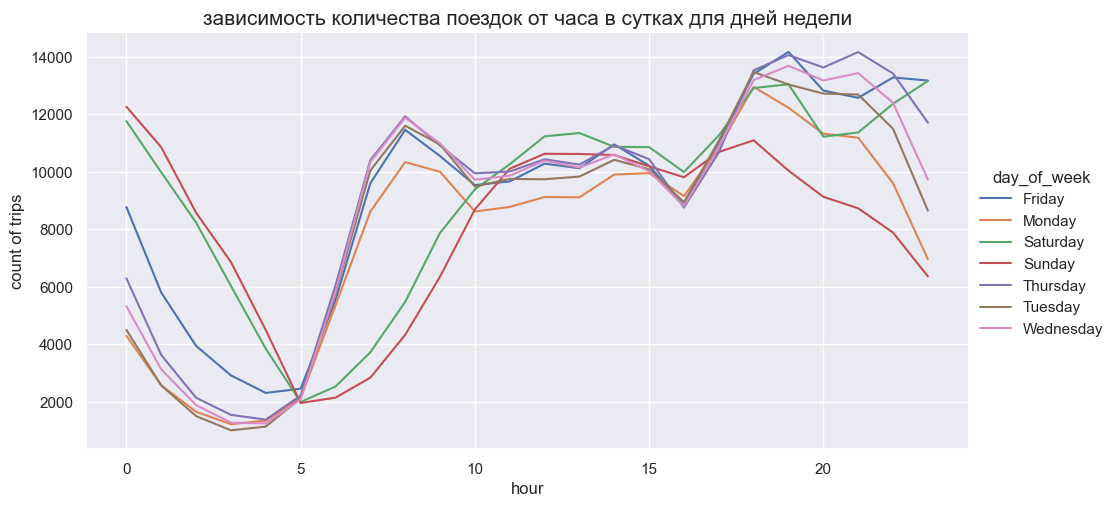

In [22]:
sns.relplot(hue = 'day_of_week', x = 'hour', y = 'month', data = task_3.groupby(['day_of_week', 'hour']).count(), kind = 'line', aspect=2)

plt.xlabel('hour')
plt.ylabel('count of trips')
plt.title('зависимость количества поездок от часа в сутках для дней недели', fontsize=15)

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

С 12 ночи до 5 утра кол-во поездок убывает и в 5 утра становится минимальным, в период с 5 утра до 8-9 утра резко начинает возрастать - **так как люди едут на работу**. Самое большое кол-во поездок наблюдаеся в период с 18-19 часов вечера - **так как люди возвращаются домой с работы**.

Самое минимальное кол-во поездок наблюдается в выходные после 5 утра, до 5 утра наоборот. - так как выходные (люди больше отдыхают)

Месяца: практичестки не отличаются, разве что можно заметить, что в июне поездок меньше, чем в остальные месяцы - так как лето, люди больше отдыхают.


In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_train, test_size=0.3)

Text(0.5, 1.0, 'график зависимости среднего логарифма времени поездки от дня недели')

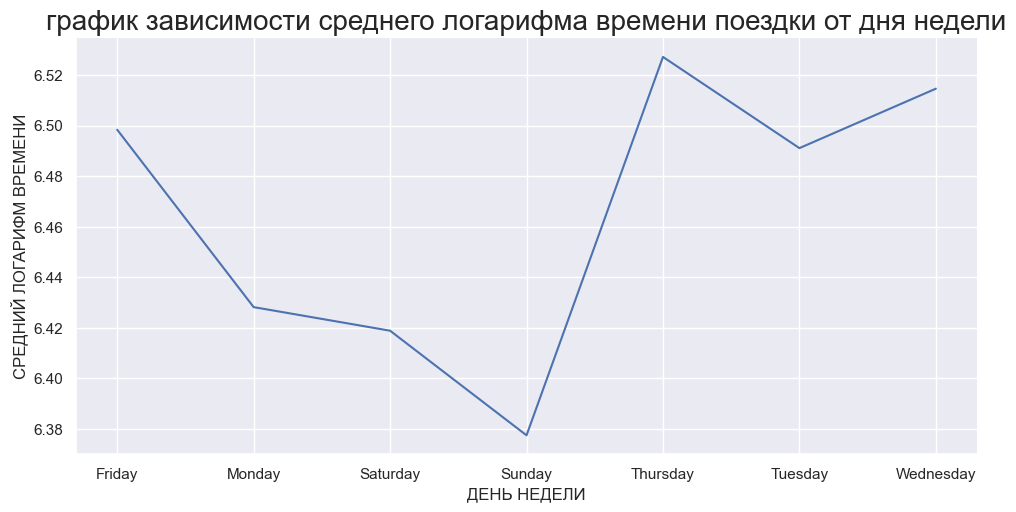

In [24]:
x = train.groupby('day_of_week')['log_trip_duration'].mean().index
y = train.groupby('day_of_week')['log_trip_duration'].mean()
sns.relplot(x = x, y = y, aspect=2, kind='line')

plt.xlabel('ДЕНЬ НЕДЕЛИ')
plt.ylabel('СРЕДНИЙ ЛОГАРИФМ ВРЕМЕНИ')
plt.title('график зависимости среднего логарифма времени поездки от дня недели', fontsize=20)

Text(0.5, 1.0, 'график зависимости среднего логарифма времени поездки от часа в сутках')

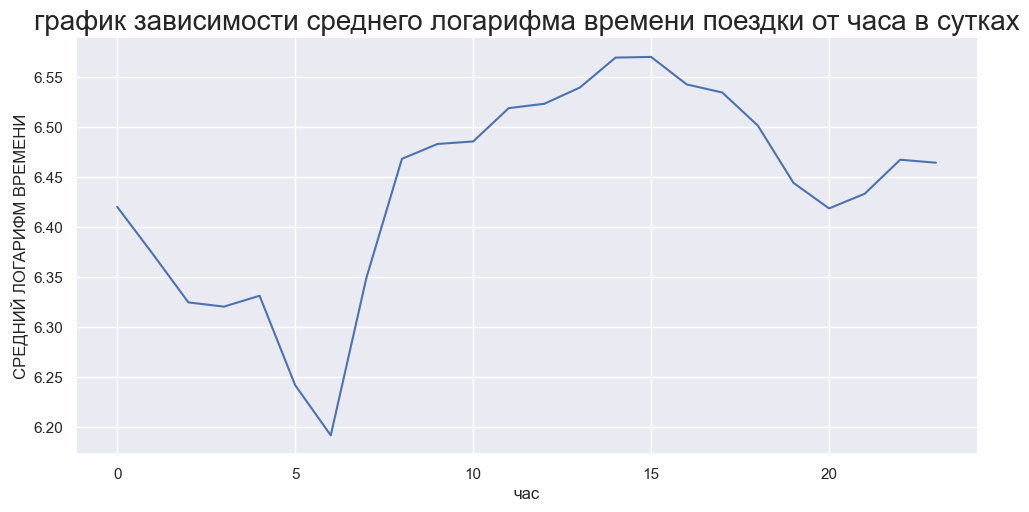

In [25]:
x = train.groupby('hour')['log_trip_duration'].mean().index
y = train.groupby('hour')['log_trip_duration'].mean()
sns.relplot(x = x, y = y, aspect=2, kind='line')

plt.xlabel('час')
plt.ylabel('СРЕДНИЙ ЛОГАРИФМ ВРЕМЕНИ')
plt.title('график зависимости среднего логарифма времени поездки от часа в сутках', fontsize=20)

Text(0.5, 1.0, 'график зависимости среднего логарифма времени поездки от дня в году')

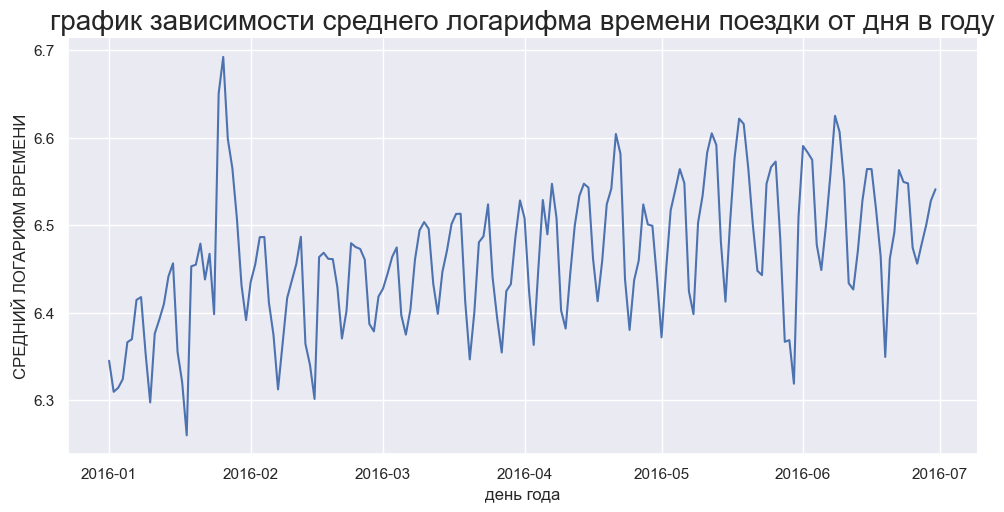

In [26]:
x = train.groupby('day_of_year')['log_trip_duration'].mean().index
y = train.groupby('day_of_year')['log_trip_duration'].mean()
sns.relplot(x = x, y = y, aspect=2, kind='line')

plt.xlabel('день года')
plt.ylabel('СРЕДНИЙ ЛОГАРИФМ ВРЕМЕНИ')
plt.title('график зависимости среднего логарифма времени поездки от дня в году', fontsize=20)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? - да, похожи распределением

Почему? - потому что. обоих случаях есть величина к которой уменьшается кол-во поездок (воскресенье и 5 утра) - в этот промежуток люди отдыхают

Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? - растет и принимает максимум значений. 
Почему так происходит? 

Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году? - да, up-trend

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели - категориальный
2. Месяц - категориальный
3. Час - категориальный
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году - численный

In [27]:
# первые три пункта я выполнила ранее, так что сделаем оставшиеся
train['is_anomal'] = 0
train.loc[train['pickup_datetime'].dt.date.isin(train['pickup_datetime'].dt.date.value_counts()[-2:].index),'is_anomal'] = 1

train['day_of_year'] = train['pickup_datetime'].dt.dayofyear

test['is_anomal'] = 0
test.loc[test['pickup_datetime'].dt.date.isin(test['pickup_datetime'].dt.date.value_counts()[-2:].index),'is_anomal'] = 1

test['day_of_year'] = test['pickup_datetime'].dt.dayofyear

In [28]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,month,day_of_week,day_of_year,is_anomal
110738,id3528487,2,2016-04-25 07:24:29,1,-73.970398,40.794060,-73.962158,40.795139,N,235,5.463832,7,4,Monday,116,0
440732,id0943045,1,2016-01-15 01:54:54,1,-73.974899,40.751759,-73.973648,40.738106,N,387,5.961005,1,1,Friday,15,0
118113,id3215486,2,2016-05-05 06:22:52,1,-73.955002,40.766472,-73.955292,40.779640,N,242,5.493061,6,5,Thursday,126,0
414965,id1687554,2,2016-03-14 00:31:31,2,-73.989296,40.729252,-73.894905,40.733498,N,1049,6.956545,0,3,Monday,74,0
625392,id3770183,1,2016-03-30 00:20:29,1,-73.945152,40.813473,-73.957291,40.812847,N,290,5.673323,0,3,Wednesday,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037609,id3177199,2,2016-06-11 05:16:14,5,-74.005013,40.740913,-73.942596,40.816677,N,1140,7.039660,5,6,Saturday,163,0
854192,id2349984,2,2016-03-14 21:01:33,1,-73.982307,40.731869,-73.990250,40.756527,N,940,6.846943,21,3,Monday,74,0
1273368,id0910344,1,2016-02-18 07:01:07,1,-73.993919,40.751179,-73.944824,40.785782,N,1574,7.362011,7,2,Thursday,49,0
481910,id0184786,2,2016-06-20 06:09:46,1,-73.962463,40.763302,-73.977928,40.752289,N,288,5.666427,6,6,Monday,172,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ:** Номер дня в году можно счиать численным признаком. Месяц сложно как-то соотнести к численным признакам, поэтому скорее это категориальный (нельзя будет сказать, что апрель больше января). День недели тоже категориальный, так как нельзя выявить схему, как их сравнивать. Час можно считать численным признаком, так как тут вроде можно сравнить несколько поездок (но учитывая момент, когда мы сравниваем, например, 11 часов вечера и 1 час ночи одного дня и разных дней, потому что в один день 11 часов будет больше 1 часа ночи, а в разные дни может быть и наоборот). Лучше час рассматривать как категориальный признак, потому что то, что час больше, не гарантирует, что поездка будет дольше.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [29]:
# распишем выборку
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_anomal']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_anomal']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

categorical_feats = ['hour', 'day_of_week','month','is_anomal']
numeric_feats = ['day_of_year']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_feats),
    ('scaling', StandardScaler(), numeric_feats)
])#класс ColumnTransformer для своей группы признаков свою трансформацию/название трансформатора 
#класс, который это делает и группа признаков, к которой мы это применяем

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.7857
Test MSE = 0.6173
Train RMSE = 0.7903
Train MSE = 0.6245


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [31]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [32]:
show_circles_on_map(data_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [33]:
show_circles_on_map(data_train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")


**Вопрос**: Какие две точки выделяются на карте?

аэропорт имени Джона Кеннеди и аэропорт Ла-Гуардия

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [34]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train['log_haversine'] = np.log1p(haversine_array(train.pickup_longitude, train.pickup_latitude, train.dropoff_longitude, train.dropoff_latitude))
train['haversine'] = haversine_array(train.pickup_longitude, train.pickup_latitude, train.dropoff_longitude, train.dropoff_latitude)

test['log_haversine'] = np.log1p(haversine_array(test.pickup_longitude, test.pickup_latitude, test.dropoff_longitude, test.dropoff_latitude))
test['haversine'] = haversine_array(test.pickup_longitude, test.pickup_latitude, test.dropoff_longitude, test.dropoff_latitude)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [35]:
train.loc[:,['log_haversine','log_trip_duration','haversine']].corr().iloc[[0,2],[1]]

,log_trip_duration
log_haversine,0.675782
haversine,0.522370


In [36]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,month,day_of_week,day_of_year,is_anomal,log_haversine,haversine
110738,id3528487,2,2016-04-25 07:24:29,1,-73.970398,40.794060,-73.962158,40.795139,N,235,5.463832,7,4,Monday,116,0,0.650666,0.916818
440732,id0943045,1,2016-01-15 01:54:54,1,-73.974899,40.751759,-73.973648,40.738106,N,387,5.961005,1,1,Friday,15,0,0.365751,0.441596
118113,id3215486,2,2016-05-05 06:22:52,1,-73.955002,40.766472,-73.955292,40.779640,N,242,5.493061,6,5,Thursday,126,0,0.340739,0.405986
414965,id1687554,2,2016-03-14 00:31:31,2,-73.989296,40.729252,-73.894905,40.733498,N,1049,6.956545,0,3,Monday,74,0,2.442051,10.496598
625392,id3770183,1,2016-03-30 00:20:29,1,-73.945152,40.813473,-73.957291,40.812847,N,290,5.673323,0,3,Wednesday,90,0,0.854357,1.349862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037609,id3177199,2,2016-06-11 05:16:14,5,-74.005013,40.740913,-73.942596,40.816677,N,1140,7.039660,5,6,Saturday,163,0,2.118625,7.319692
854192,id2349984,2,2016-03-14 21:01:33,1,-73.982307,40.731869,-73.990250,40.756527,N,940,6.846943,21,3,Monday,74,0,0.771393,1.162778
1273368,id0910344,1,2016-02-18 07:01:07,1,-73.993919,40.751179,-73.944824,40.785782,N,1574,7.362011,7,2,Thursday,49,0,1.881231,5.561575
481910,id0184786,2,2016-06-20 06:09:46,1,-73.962463,40.763302,-73.977928,40.752289,N,288,5.666427,6,6,Monday,172,0,1.012524,1.752539


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [37]:
train['speed'] = (train['haversine'])/(train['trip_duration'])
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,month,day_of_week,day_of_year,is_anomal,log_haversine,haversine,speed
110738,id3528487,2,2016-04-25 07:24:29,1,-73.970398,40.794060,-73.962158,40.795139,N,235,5.463832,7,4,Monday,116,0,0.650666,0.916818,0.003901
440732,id0943045,1,2016-01-15 01:54:54,1,-73.974899,40.751759,-73.973648,40.738106,N,387,5.961005,1,1,Friday,15,0,0.365751,0.441596,0.001141
118113,id3215486,2,2016-05-05 06:22:52,1,-73.955002,40.766472,-73.955292,40.779640,N,242,5.493061,6,5,Thursday,126,0,0.340739,0.405986,0.001678
414965,id1687554,2,2016-03-14 00:31:31,2,-73.989296,40.729252,-73.894905,40.733498,N,1049,6.956545,0,3,Monday,74,0,2.442051,10.496598,0.010006
625392,id3770183,1,2016-03-30 00:20:29,1,-73.945152,40.813473,-73.957291,40.812847,N,290,5.673323,0,3,Wednesday,90,0,0.854357,1.349862,0.004655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037609,id3177199,2,2016-06-11 05:16:14,5,-74.005013,40.740913,-73.942596,40.816677,N,1140,7.039660,5,6,Saturday,163,0,2.118625,7.319692,0.006421
854192,id2349984,2,2016-03-14 21:01:33,1,-73.982307,40.731869,-73.990250,40.756527,N,940,6.846943,21,3,Monday,74,0,0.771393,1.162778,0.001237
1273368,id0910344,1,2016-02-18 07:01:07,1,-73.993919,40.751179,-73.944824,40.785782,N,1574,7.362011,7,2,Thursday,49,0,1.881231,5.561575,0.003533
481910,id0184786,2,2016-06-20 06:09:46,1,-73.962463,40.763302,-73.977928,40.752289,N,288,5.666427,6,6,Monday,172,0,1.012524,1.752539,0.006085


/var/folders/qg/bhrjqlw5373cm3pjz7y0yntc0000gn/T/ipykernel_95037/2857798949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['speed'])


<Axes: xlabel='speed', ylabel='Density'>

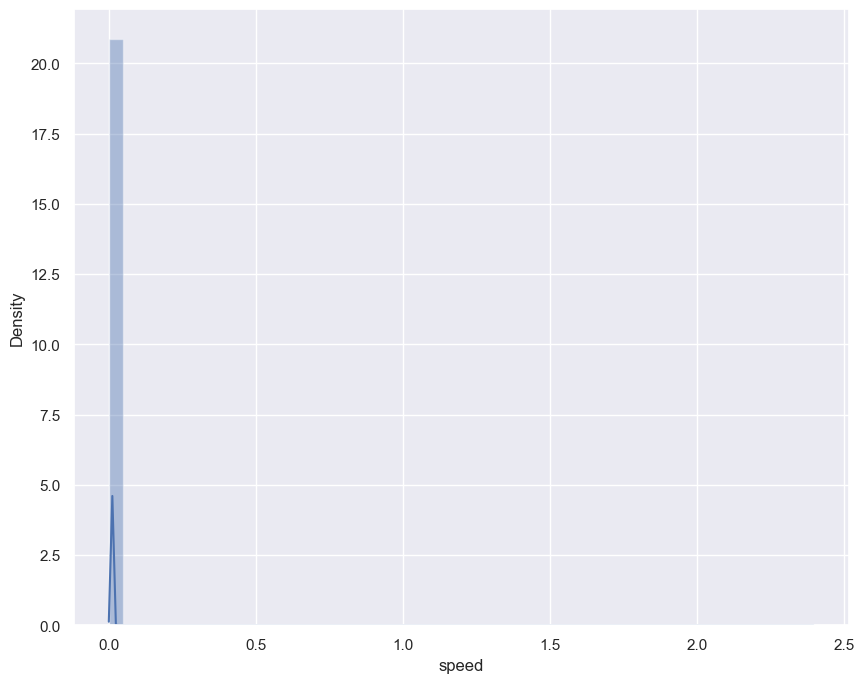

In [38]:
sns.distplot(train['speed'])

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

/var/folders/qg/bhrjqlw5373cm3pjz7y0yntc0000gn/T/ipykernel_95037/3342875461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp['speed'])


<Axes: xlabel='speed', ylabel='Density'>

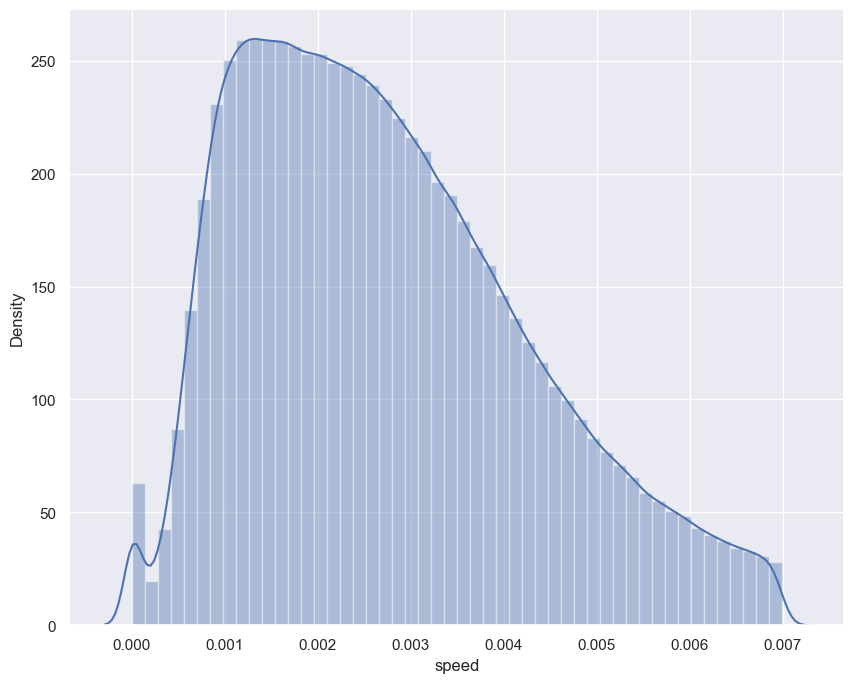

In [39]:
tmp = train[train['speed'] < train['speed'].mean() + train['speed'].std()]
sns.distplot(tmp['speed'])

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [40]:
tmp = list(list())
tmp.append(train[train['day_of_week'] == 'Monday'].groupby(['hour']).median().speed)
tmp.append(train[train['day_of_week'] == 'Tuesday'].groupby(['hour']).median().speed)
tmp.append(train[train['day_of_week'] == 'Wednesday'].groupby(['hour']).median().speed)
tmp.append(train[train['day_of_week'] == 'Thursday'].groupby(['hour']).median().speed)
tmp.append(train[train['day_of_week'] == 'Friday'].groupby(['hour']).median().speed)
tmp.append(train[train['day_of_week'] == 'Saturday'].groupby(['hour']).median().speed)
tmp.append(train[train['day_of_week'] == 'Sunday'].groupby(['hour']).median().speed)

/var/folders/qg/bhrjqlw5373cm3pjz7y0yntc0000gn/T/ipykernel_95037/540306549.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp.append(train[train['day_of_week'] == 'Monday'].groupby(['hour']).median().speed)
/var/folders/qg/bhrjqlw5373cm3pjz7y0yntc0000gn/T/ipykernel_95037/540306549.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp.append(train[train['day_of_week'] == 'Tuesday'].groupby(['hour']).median().speed)
/var/folders/qg/bhrjqlw5373cm3pjz7y0yntc0000gn/T/ipykernel_95037/540306549.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future v

Text(0.5, 1.0, 'график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости')

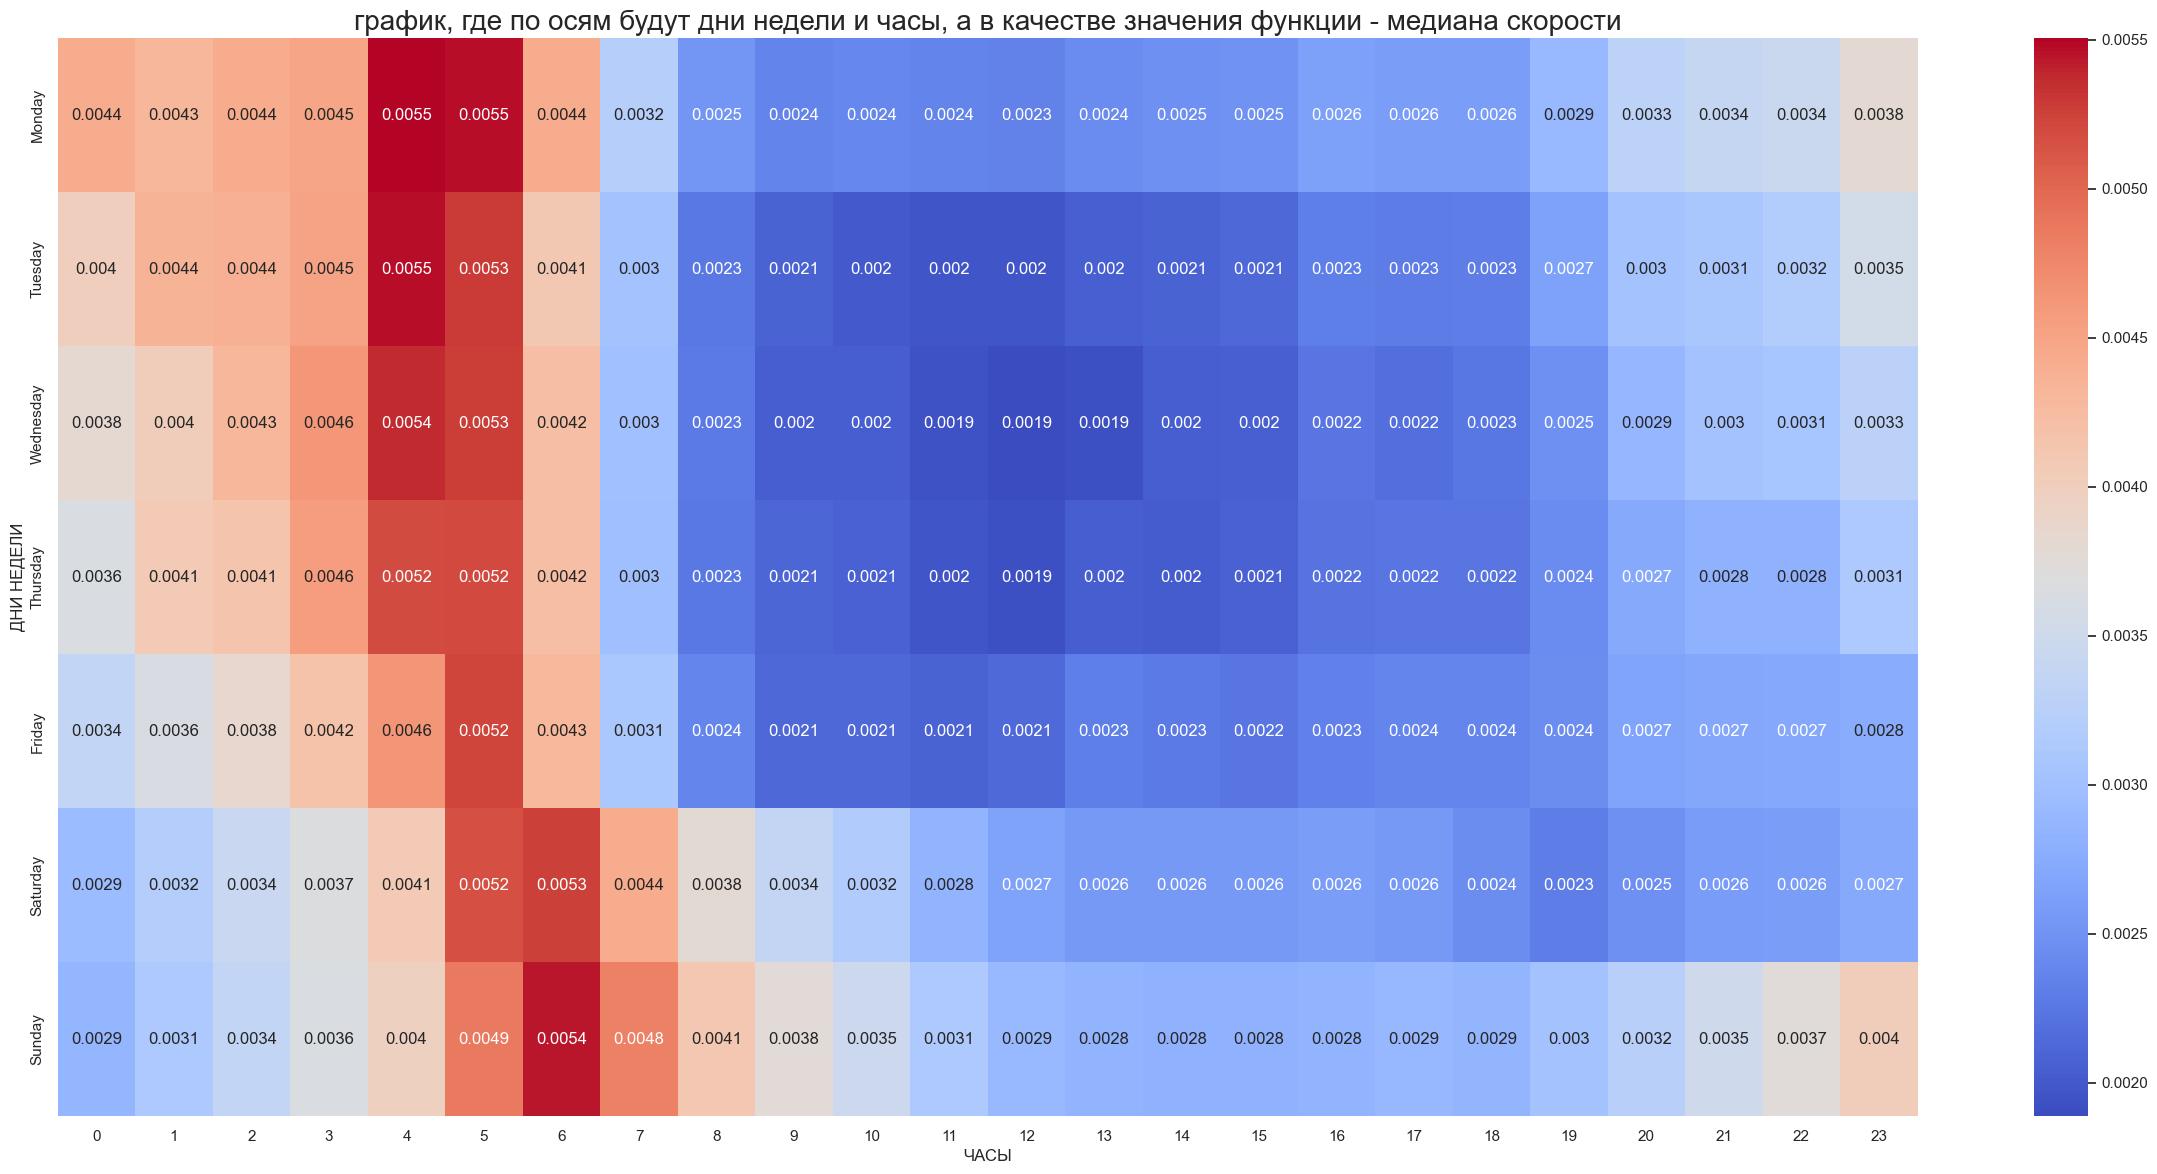

In [41]:
plt.figure(figsize = (30,14))

plt.xticks(train['hour'].unique())
sns.heatmap(tmp, cmap='coolwarm', annot=True, yticklabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.xlabel('ЧАСЫ')
plt.ylabel('ДНИ НЕДЕЛИ')
plt.title('график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости', fontsize=20)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ:** Потому что через скорость мы сразу можем получить таргет, а значит нет смысла в обучении модели, так как мы грубо говоря даем ей значение, которое надо найти. А также мы не можем для тестовой выборки понять скорость, так как у нас нет значения расстояния (которое мы и должны предсказать). Поэтому мы не можем использовать этот признак.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [42]:
train['free_roads'] = 0
train.loc[((train['hour'] >= 4) & (train['hour'] <= 9) & (train['day_of_week'].isin(['Sunday', 'Saturday']))), 'free_roads'] = 1
train.loc[((train['hour'] >= 0) & (train['hour'] <= 6) & (train['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))), 'free_roads'] = 1

test['free_roads'] = 0
test.loc[((test['hour'] >= 4) & (test['hour'] <= 9) & (test['day_of_week'].isin(['Sunday', 'Saturday']))), 'free_roads'] = 1
test.loc[((test['hour'] >= 0) & (test['hour'] <= 6) & (test['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))), 'free_roads'] = 1

In [43]:
train['free_roads']

110738     0
440732     1
118113     1
414965     1
625392     1
          ..
1037609    1
854192     0
1273368    0
481910     1
621567     1
Name: free_roads, Length: 1021050, dtype: int64

Скорость максимальна утром, начиная с 4 до 7, так как **в это время нет пробок**. Скорость минимальна в будни с 8 до 18 часов.


**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [44]:
train['airport_start'] = 0
train['airport_finish'] = 0

test['airport_start'] = 0
test['airport_finish'] = 0

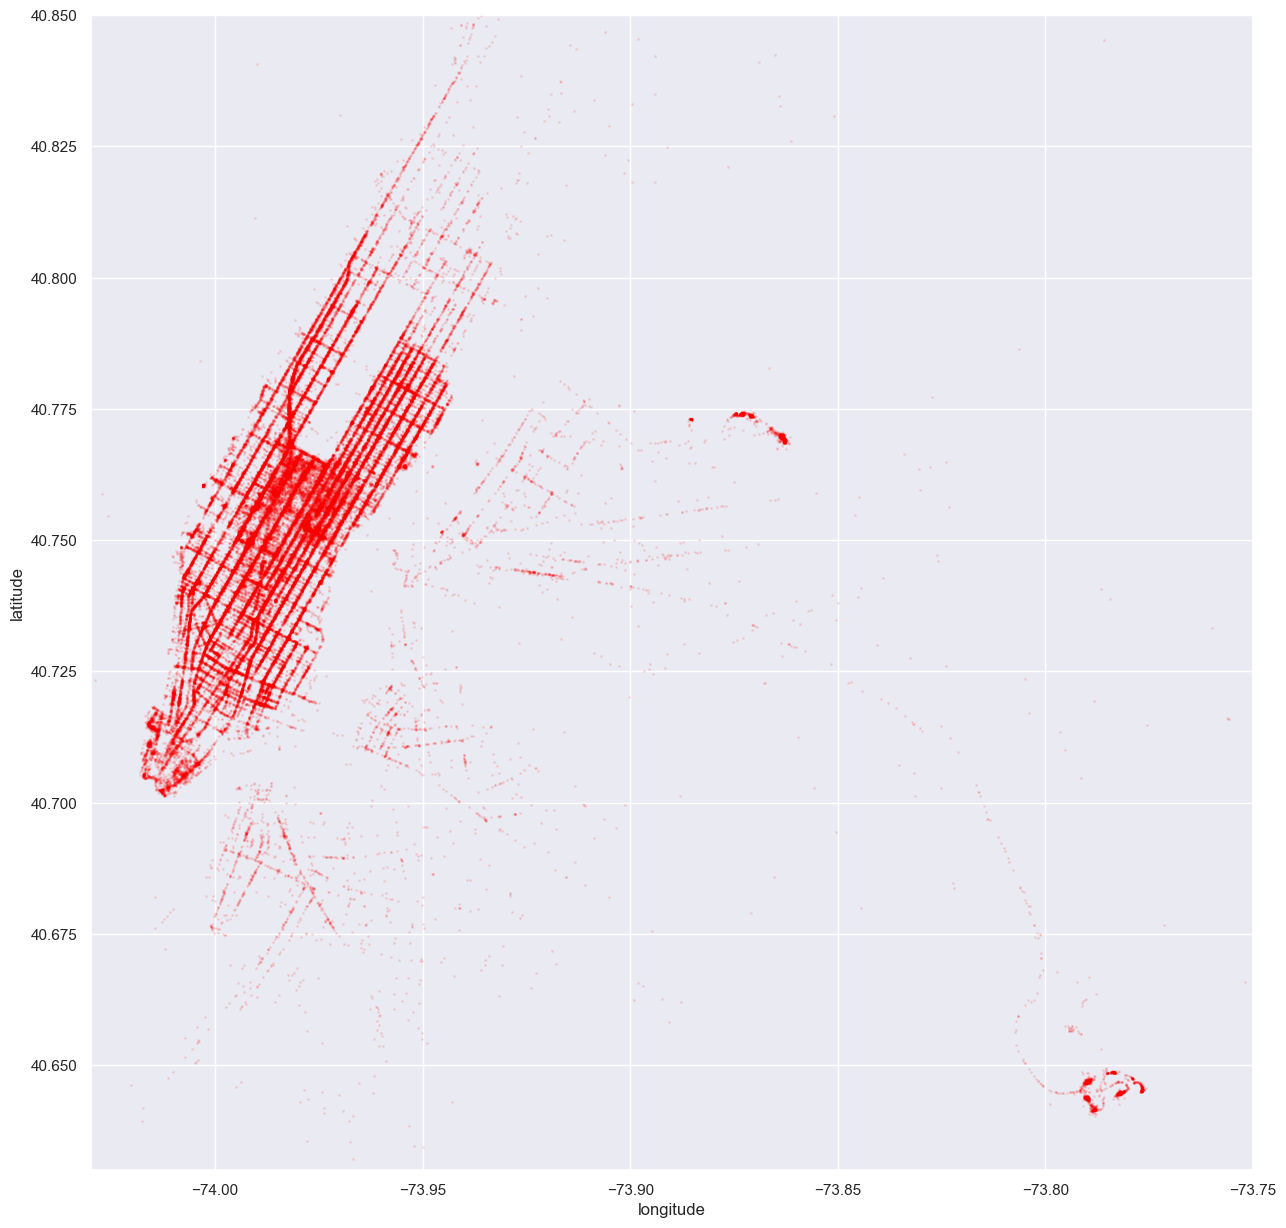

In [45]:
#Попробуем нарисовать, откуда обычно стартуют поездки. - записи с семинара №1
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='red', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

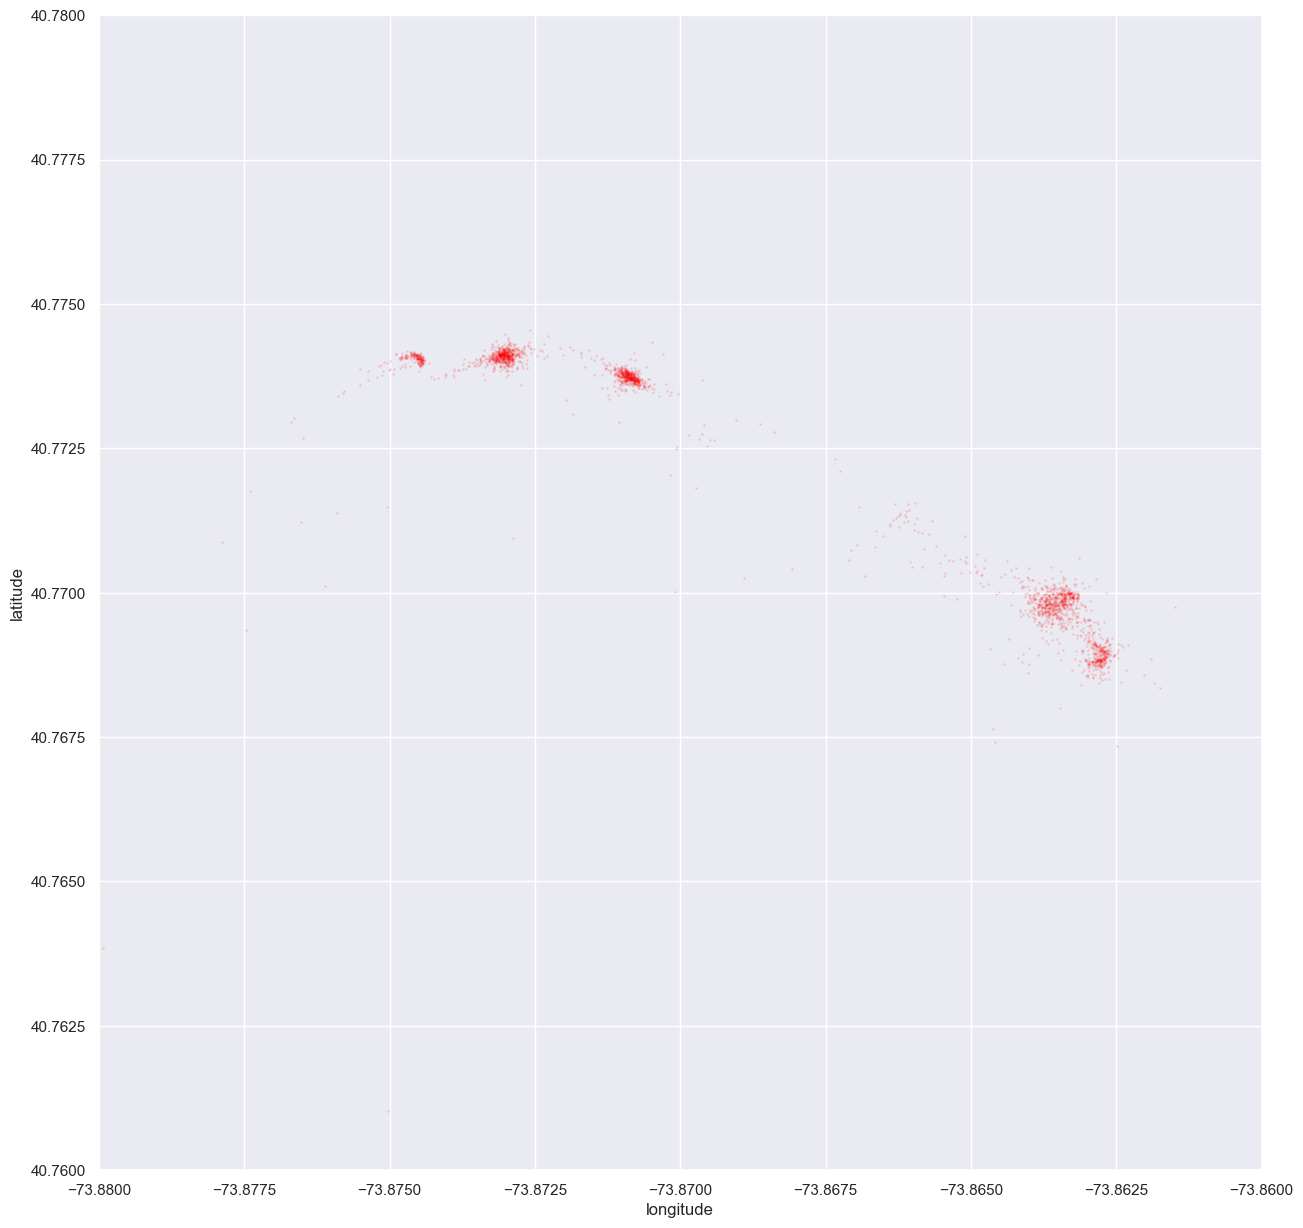

In [46]:
#Наши две аномальные точки явно видно, и мы можем выделить границы по долготе и широте для них.

N = 100000
city_long_border = (-73.88, -73.86)
city_lat_border = (40.76, 40.78)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='red', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()


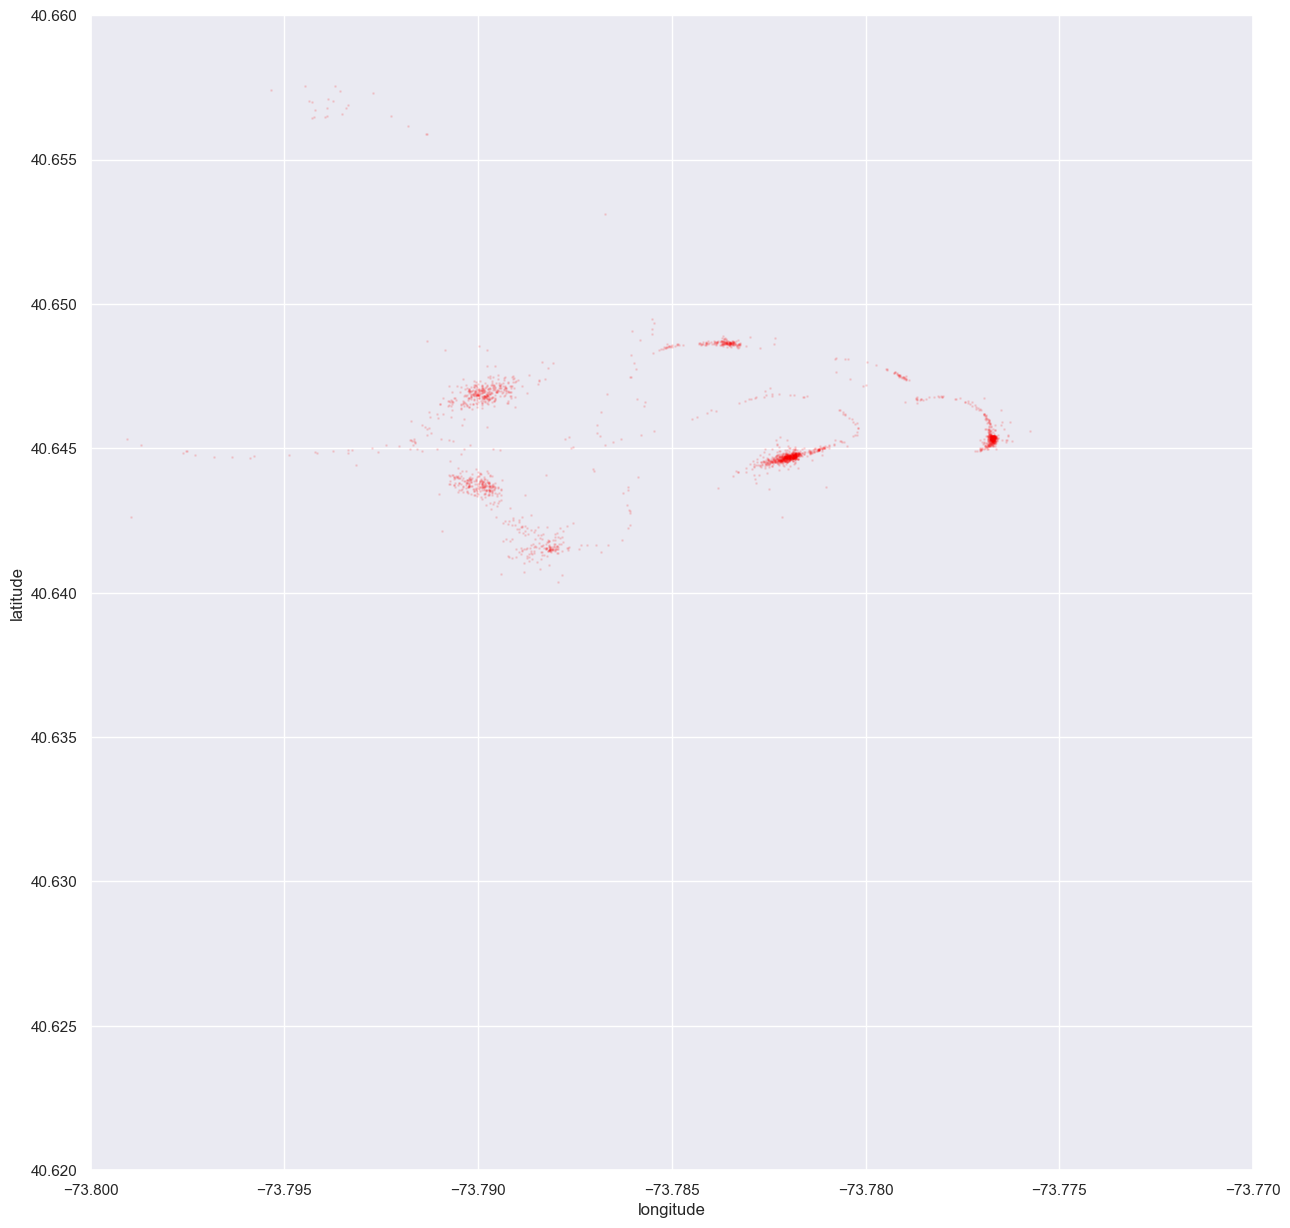

In [47]:
N = 100000
city_long_border = (-73.8, -73.77)
city_lat_border = (40.62, 40.66)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='red', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [58]:
def f1(lat,lon):
  return ((40.62 < data_train[lat]) & (data_train[lat] < 40.66) & (-73.8 < data_train[lon]) & (data_train[lon] < -73.77))
  
def f2(lat,lon):
  return ((40.76 < data_train[lat]) & (data_train[lat] < 40.78) & (-73.88 < data_train[lon]) & (data_train[lon] < -73.86))

In [64]:
test['airport_start'].unique()

array([0, 2, 1])

In [59]:
train.loc[(f1('pickup_latitude','pickup_longitude')), 'airport_start'] = 1
train.loc[(f2('pickup_latitude','pickup_longitude')), 'airport_start'] = 2

train.loc[(f1('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 1
train.loc[(f2('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 2

test.loc[(f1('pickup_latitude','pickup_longitude')), 'airport_start'] = 1
test.loc[(f2('pickup_latitude','pickup_longitude')), 'airport_start'] = 2

test.loc[(f1('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 1
test.loc[(f2('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 2

In [65]:
# У меня 2 колонки: airport_start, airport_finish. Например, для первой значения 0, 1 или 2:
# 0 - движение началось не в аэропорту,
# 1 - началось в первом аэропорту,
# 2 - началось во втором аэропорту.
# И аналогично для airport_finish.
train['airport_start'].unique()

array([0, 2, 1])

In [66]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,month,day_of_week,day_of_year,is_anomal,log_haversine,haversine,speed,free_roads,airport_start,airport_finish
110738,id3528487,2,2016-04-25 07:24:29,1,-73.970398,40.794060,-73.962158,40.795139,N,235,...,4,Monday,116,0,0.650666,0.916818,0.003901,0,0,0
440732,id0943045,1,2016-01-15 01:54:54,1,-73.974899,40.751759,-73.973648,40.738106,N,387,...,1,Friday,15,0,0.365751,0.441596,0.001141,1,0,0
118113,id3215486,2,2016-05-05 06:22:52,1,-73.955002,40.766472,-73.955292,40.779640,N,242,...,5,Thursday,126,0,0.340739,0.405986,0.001678,1,0,0
414965,id1687554,2,2016-03-14 00:31:31,2,-73.989296,40.729252,-73.894905,40.733498,N,1049,...,3,Monday,74,0,2.442051,10.496598,0.010006,1,0,0
625392,id3770183,1,2016-03-30 00:20:29,1,-73.945152,40.813473,-73.957291,40.812847,N,290,...,3,Wednesday,90,0,0.854357,1.349862,0.004655,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037609,id3177199,2,2016-06-11 05:16:14,5,-74.005013,40.740913,-73.942596,40.816677,N,1140,...,6,Saturday,163,0,2.118625,7.319692,0.006421,1,0,0
854192,id2349984,2,2016-03-14 21:01:33,1,-73.982307,40.731869,-73.990250,40.756527,N,940,...,3,Monday,74,0,0.771393,1.162778,0.001237,0,0,0
1273368,id0910344,1,2016-02-18 07:01:07,1,-73.993919,40.751179,-73.944824,40.785782,N,1574,...,2,Thursday,49,0,1.881231,5.561575,0.003533,0,0,0
481910,id0184786,2,2016-06-20 06:09:46,1,-73.962463,40.763302,-73.977928,40.752289,N,288,...,6,Monday,172,0,1.012524,1.752539,0.006085,1,0,0


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<Axes: xlabel='airport_start', ylabel='log_trip_duration'>

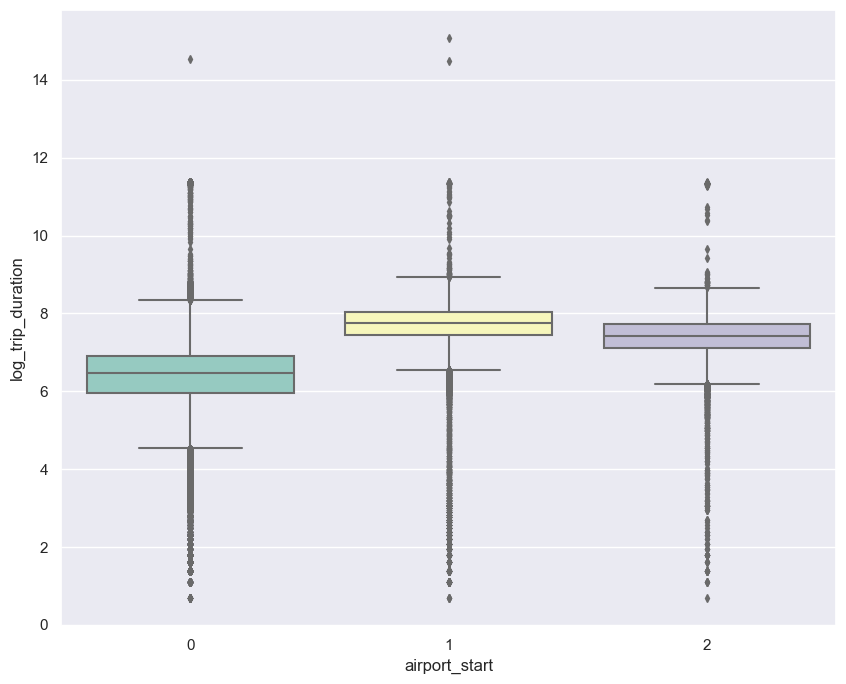

In [67]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = train['airport_start'], y = train['log_trip_duration'], palette="Set3", data = train, fliersize=4)

<Axes: xlabel='airport_finish', ylabel='log_trip_duration'>

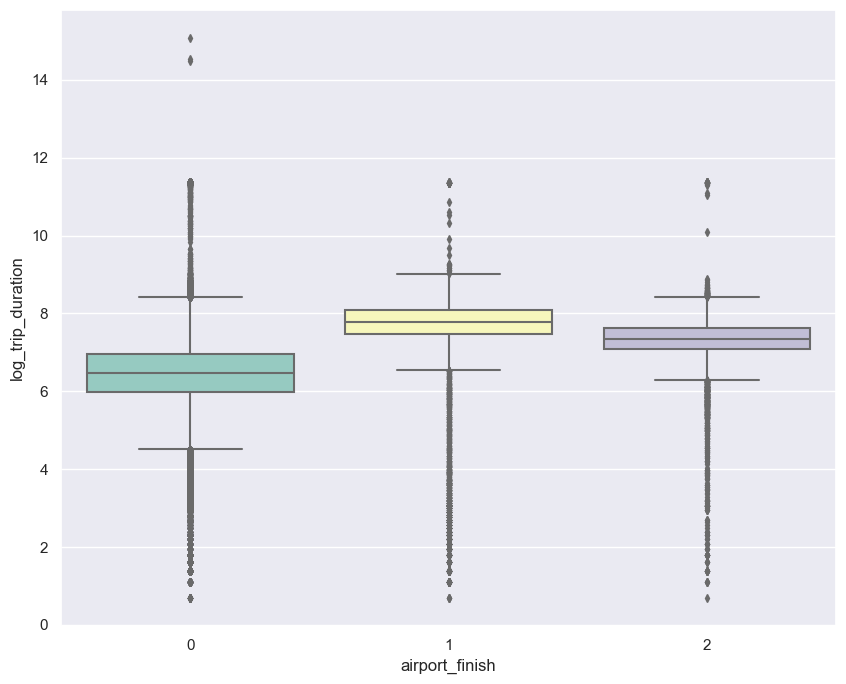

In [68]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = train['airport_finish'], y = train['log_trip_duration'], palette="Set3", data = train, fliersize=4)

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Длительность поездок, которые начинаются или заканчиваются в аэропортах, больше, чем у других. Это логично, поэтому будем считать признаки хорошими.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

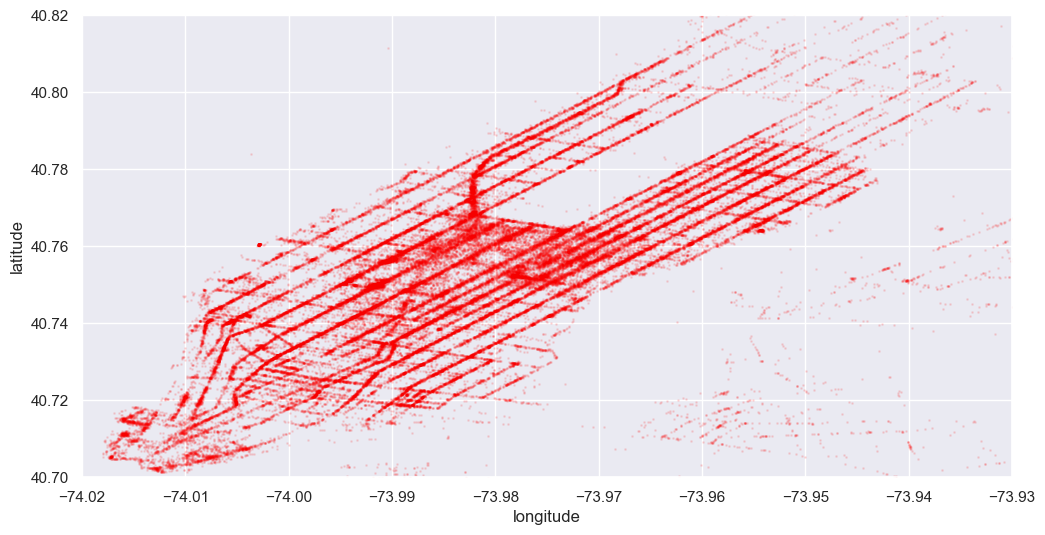

In [69]:
# часть карты, где много поездок
N = 100000
city_long_border = (-74.02, -73.93)
city_lat_border = (40.70, 40.82)
plt.figure(figsize=(12,6))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='red', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()


In [70]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    #def __init__(self, ...):
    #    pass
    
    def show_map(self, X=None):
        pass
      
    def fit(self, X=None, y=None):
        # your code here
        self.X = X.copy()

        self.X['grid_first'] = -1
        self.X['grid_second'] = -1

        # да, это выглядит страшно, но я разбила на квадратики руками (12 квадратиков)

        self.mask_of_square1_f = [((self.X['pickup_latitude'] > 40.79) & (self.X['pickup_latitude'] < 40.82) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square1_s = [((self.X['dropoff_latitude'] > 40.79) & (self.X['dropoff_latitude'] < 40.82) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square2_f = [((self.X['pickup_latitude'] > 40.79) & (self.X['pickup_latitude'] < 40.82) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square2_s = [((self.X['dropoff_latitude'] > 40.79) & (self.X['dropoff_latitude'] < 40.82) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square3_f = [((self.X['pickup_latitude'] > 40.79) & (self.X['pickup_latitude'] < 40.82) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square3_s = [((self.X['dropoff_latitude'] > 40.79) & (self.X['dropoff_latitude'] < 40.82) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        self.mask_of_square4_f = [((self.X['pickup_latitude'] > 40.76) & (self.X['pickup_latitude'] <= 40.79) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square4_s = [((self.X['dropoff_latitude'] > 40.76) & (self.X['dropoff_latitude'] <= 40.79) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square5_f = [((self.X['pickup_latitude'] > 40.76) & (self.X['pickup_latitude'] <= 40.79) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square5_s = [((self.X['dropoff_latitude'] > 40.76) & (self.X['dropoff_latitude'] <= 40.79) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square6_f = [((self.X['pickup_latitude'] > 40.76) & (self.X['pickup_latitude'] <= 40.79) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square6_s = [((self.X['dropoff_latitude'] > 40.76) & (self.X['dropoff_latitude'] <= 40.79) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        self.mask_of_square7_f = [((self.X['pickup_latitude'] > 40.73) & (self.X['pickup_latitude'] <= 40.76) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square7_s = [((self.X['dropoff_latitude'] > 40.73) & (self.X['dropoff_latitude'] <= 40.76) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square8_f = [((self.X['pickup_latitude'] > 40.73) & (self.X['pickup_latitude'] <= 40.76) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square8_s = [((self.X['dropoff_latitude'] > 40.73) & (self.X['dropoff_latitude'] <= 40.76) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square9_f = [((self.X['pickup_latitude'] > 40.73) & (self.X['pickup_latitude'] <= 40.76) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square9_s = [((self.X['dropoff_latitude'] > 40.73) & (self.X['dropoff_latitude'] <= 40.76) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        self.mask_of_square10_f = [((self.X['pickup_latitude'] > 40.70) & (self.X['pickup_latitude'] <= 40.73) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square10_s = [((self.X['dropoff_latitude'] > 40.70) & (self.X['dropoff_latitude'] <= 40.73) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square11_f = [((self.X['pickup_latitude'] > 40.70) & (self.X['pickup_latitude'] <= 40.73) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square11_s = [((self.X['dropoff_latitude'] > 40.70) & (self.X['dropoff_latitude'] <= 40.73) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square12_f = [((self.X['pickup_latitude'] > 40.70) & (self.X['pickup_latitude'] <= 40.73) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square12_s = [((self.X['dropoff_latitude'] > 40.70) & (self.X['dropoff_latitude'] <= 40.73) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        return self

    def transform(self, X, y=None):
        # your code here
        tmp = self.X[self.mask_of_square1_f[0]].copy()
        self.X.loc[self.mask_of_square1_f[0], ['grid_first']] = 1
        tmp = self.X[self.mask_of_square1_s[0]].copy()
        self.X.loc[self.mask_of_square1_s[0], ['grid_second']] = 1

        tmp = self.X[self.mask_of_square2_f[0]].copy()
        self.X.loc[self.mask_of_square2_f[0], ['grid_first']] = 2
        tmp = self.X[self.mask_of_square2_s[0]].copy()
        self.X.loc[self.mask_of_square2_s[0], ['grid_second']] = 2

        tmp = self.X[self.mask_of_square3_f[0]].copy()
        self.X.loc[self.mask_of_square3_f[0], ['grid_first']] = 3
        tmp = self.X[self.mask_of_square3_s[0]].copy()
        self.X.loc[self.mask_of_square3_s[0], ['grid_second']] = 3

        tmp = self.X[self.mask_of_square4_f[0]].copy()
        self.X.loc[self.mask_of_square4_f[0], ['grid_first']] = 4
        tmp = self.X[self.mask_of_square4_s[0]].copy()
        self.X.loc[self.mask_of_square4_s[0], ['grid_second']] = 4

        tmp = self.X[self.mask_of_square5_f[0]].copy()
        self.X.loc[self.mask_of_square5_f[0], ['grid_first']] = 5
        tmp = self.X[self.mask_of_square5_s[0]].copy()
        self.X.loc[self.mask_of_square5_s[0], ['grid_second']] = 5

        tmp = self.X[self.mask_of_square6_f[0]].copy()
        self.X.loc[self.mask_of_square6_f[0], ['grid_first']] = 6
        tmp = self.X[self.mask_of_square6_s[0]].copy()
        self.X.loc[self.mask_of_square6_s[0], ['grid_second']] = 6

        tmp = self.X[self.mask_of_square7_f[0]].copy()
        self.X.loc[self.mask_of_square7_f[0], ['grid_first']] = 7
        tmp = self.X[self.mask_of_square7_s[0]].copy()
        self.X.loc[self.mask_of_square7_s[0], ['grid_second']] = 7

        tmp = self.X[self.mask_of_square8_f[0]].copy()
        self.X.loc[self.mask_of_square8_f[0], ['grid_first']] = 8
        tmp = self.X[self.mask_of_square8_s[0]].copy()
        self.X.loc[self.mask_of_square8_s[0], ['grid_second']] = 8

        tmp = self.X[self.mask_of_square9_f[0]].copy()
        self.X.loc[self.mask_of_square9_f[0], ['grid_first']] = 9
        tmp = self.X[self.mask_of_square9_s[0]].copy()
        self.X.loc[self.mask_of_square9_s[0], ['grid_second']] = 9

        tmp = self.X[self.mask_of_square9_f[0]].copy()
        self.X.loc[self.mask_of_square9_f[0], ['grid_first']] = 10
        tmp = self.X[self.mask_of_square9_s[0]].copy()
        self.X.loc[self.mask_of_square9_s[0], ['grid_second']] = 10

        tmp = self.X[self.mask_of_square11_f[0]].copy()
        self.X.loc[self.mask_of_square11_f[0], ['grid_first']] = 11
        tmp = self.X[self.mask_of_square11_s[0]].copy()
        self.X.loc[self.mask_of_square11_s[0], ['grid_second']] = 11

        tmp = self.X[self.mask_of_square12_f[0]].copy()
        self.X.loc[self.mask_of_square12_f[0], ['grid_first']] = 12
        tmp = self.X[self.mask_of_square12_s[0]].copy()
        self.X.loc[self.mask_of_square12_s[0], ['grid_second']] = 12

        return self.X

In [71]:
grid1 = MapGridTransformer()
grid1.fit(train)
add_train = grid1.transform(train)

grid2 = MapGridTransformer()
grid2.fit(test)
add_test = grid2.transform(test)

In [72]:
train['grid_first'] = add_train['grid_first']
train['grid_second'] = add_train['grid_second']

test['grid_first'] = add_test['grid_first']
test['grid_second'] = add_test['grid_second']

In [73]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,day_of_year,is_anomal,log_haversine,haversine,speed,free_roads,airport_start,airport_finish,grid_first,grid_second
110738,id3528487,2,2016-04-25 07:24:29,1,-73.970398,40.794060,-73.962158,40.795139,N,235,...,116,0,0.650666,0.916818,0.003901,0,0,0,2,2
440732,id0943045,1,2016-01-15 01:54:54,1,-73.974899,40.751759,-73.973648,40.738106,N,387,...,15,0,0.365751,0.441596,0.001141,1,0,0,8,8
118113,id3215486,2,2016-05-05 06:22:52,1,-73.955002,40.766472,-73.955292,40.779640,N,242,...,126,0,0.340739,0.405986,0.001678,1,0,0,6,6
414965,id1687554,2,2016-03-14 00:31:31,2,-73.989296,40.729252,-73.894905,40.733498,N,1049,...,74,0,2.442051,10.496598,0.010006,1,0,0,11,-1
625392,id3770183,1,2016-03-30 00:20:29,1,-73.945152,40.813473,-73.957291,40.812847,N,290,...,90,0,0.854357,1.349862,0.004655,1,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037609,id3177199,2,2016-06-11 05:16:14,5,-74.005013,40.740913,-73.942596,40.816677,N,1140,...,163,0,2.118625,7.319692,0.006421,1,0,0,7,3
854192,id2349984,2,2016-03-14 21:01:33,1,-73.982307,40.731869,-73.990250,40.756527,N,940,...,74,0,0.771393,1.162778,0.001237,0,0,0,8,7
1273368,id0910344,1,2016-02-18 07:01:07,1,-73.993919,40.751179,-73.944824,40.785782,N,1574,...,49,0,1.881231,5.561575,0.003533,0,0,0,7,6
481910,id0184786,2,2016-06-20 06:09:46,1,-73.962463,40.763302,-73.977928,40.752289,N,288,...,172,0,1.012524,1.752539,0.006085,1,0,0,5,8


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [74]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_anomal', 'log_haversine', 'airport_start', 'airport_finish', 'free_roads', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_anomal', 'log_haversine', 'airport_start', 'airport_finish', 'free_roads', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

categorical_feats = ['hour', 'day_of_week','month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second']
numeric_feats = ['day_of_year', 'log_haversine', 'is_anomal', 'free_roads']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_feats),
    ('scaling', StandardScaler(), numeric_feats)
])#класс ColumnTransformer для своей группы признаков свою трансформацию/название трансформатора 
#класс, который это делает и группа признаков, к которой мы это применяем

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5444
Test MSE = 0.2964
Train RMSE = 0.5473
Train MSE = 0.2995


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [76]:
train['vendor_id'].unique()

array([2, 1])

In [77]:
train['passenger_count'].unique()

array([1, 2, 3, 6, 4, 5, 0, 7, 8, 9])

Если кол-во поссажиров превышает 3 человек, то скорее всего это не легковой автомобиль, а значит поездка будет дольше, так как автобусы/маршрутки дольше передвигаются.

In [78]:
train['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<Axes: xlabel='vendor_id', ylabel='log_trip_duration'>

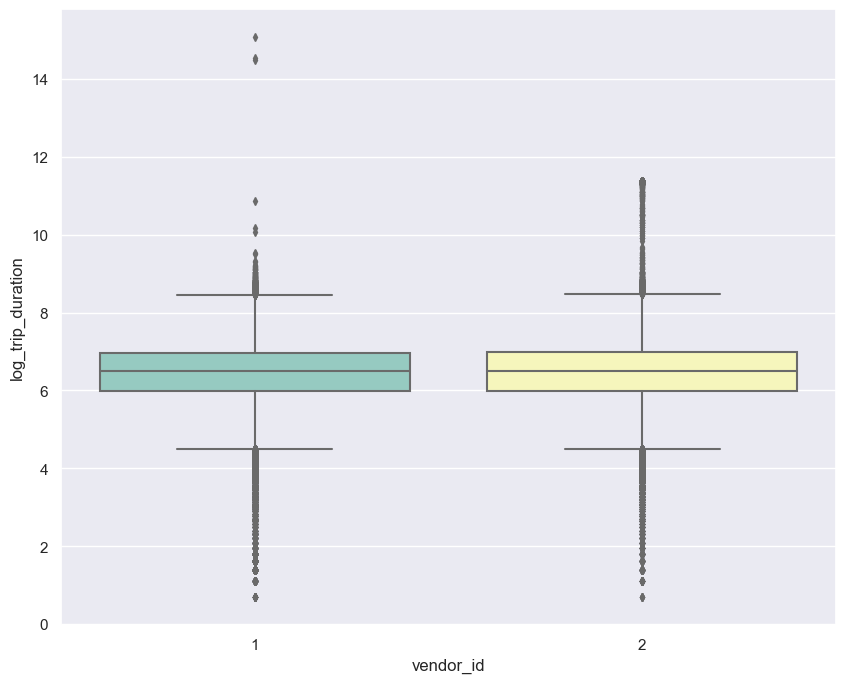

In [79]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = train['vendor_id'], y = train['log_trip_duration'], palette="Set3", data = train, fliersize=4)

<Axes: xlabel='passenger_count', ylabel='log_trip_duration'>

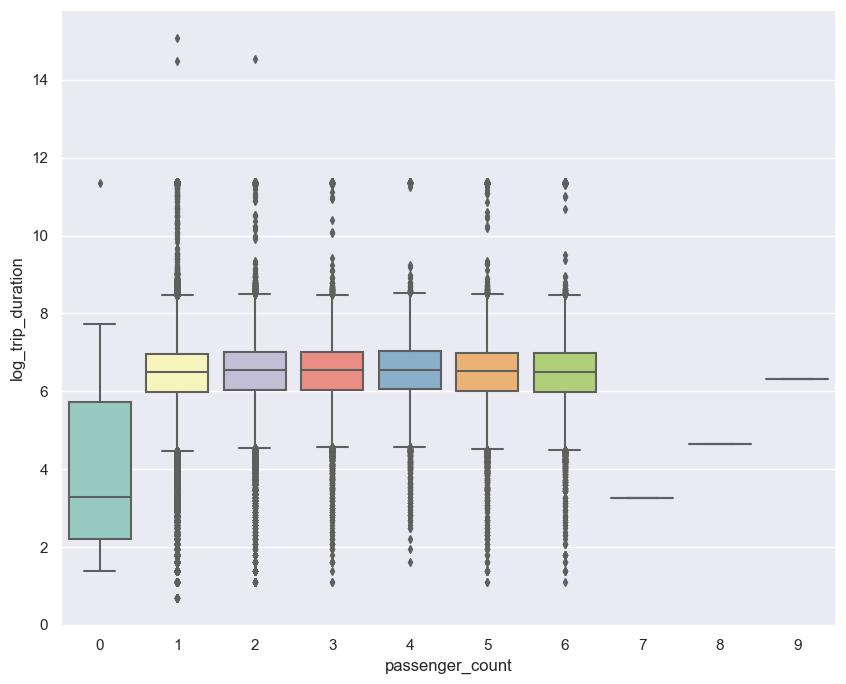

In [80]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = train['passenger_count'], y = train['log_trip_duration'], palette="Set3", data = train, fliersize=4)

<Axes: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

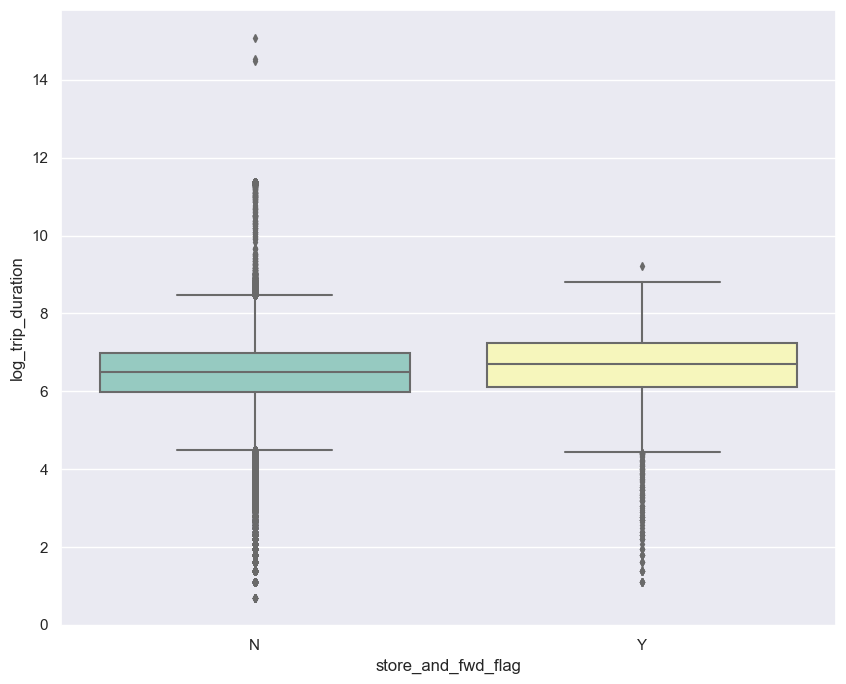

In [81]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = train['store_and_fwd_flag'], y = train['log_trip_duration'], palette="Set3", data = train, fliersize=4)

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [82]:
train['vendor_id'] = train['vendor_id'].replace({1 : 0, 2 : 1})
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].replace({'N' : 0, 'Y' : 1})

test['vendor_id'] = test['vendor_id'].replace({1 : 0, 2 : 1})
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].replace({'N' : 0, 'Y' : 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ:** Кажется, что эти признаки нам не помогут, потому что для разных значений признака мы получаем практически одинаковые значения целевой переменной. Только если passenger_count: когда этот признак равен 0, то продолжительность меньше, так как это скорее всего те случаи, когда такси едет к заказчику, а в данном случае обычно выбирается одна из ближайших машин => продолжительность меньше; когда != 0, то продолжительность больше. Также при store_and_fwd_flag == 'Y' продолжительность немного больше, но это не значительно. Попробуем дальше предположить, что эти признаки как-то влияют, и посмотрим, как будет работать модель. Но такие признаки мне кажутся немного бесполезными. 

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [83]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_anomal', 'log_haversine', 'airport_start', 'airport_finish', 'free_roads', 'grid_first', 'grid_second', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_anomal', 'log_haversine', 'airport_start', 'airport_finish', 'free_roads', 'grid_first', 'grid_second', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [84]:
categorical_feats = ['hour', 'day_of_week','month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second', 'vendor_id','store_and_fwd_flag']
numeric_feats = ['day_of_year', 'log_haversine', 'is_anomal', 'free_roads', 'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_feats),
    ('scaling', StandardScaler(), numeric_feats)
])#класс ColumnTransformer для своей группы признаков свою трансформацию/название трансформатора 
#класс, который это делает и группа признаков, к которой мы это применяем

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5443
Test MSE = 0.2962
Train RMSE = 0.5471
Train MSE = 0.2993


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

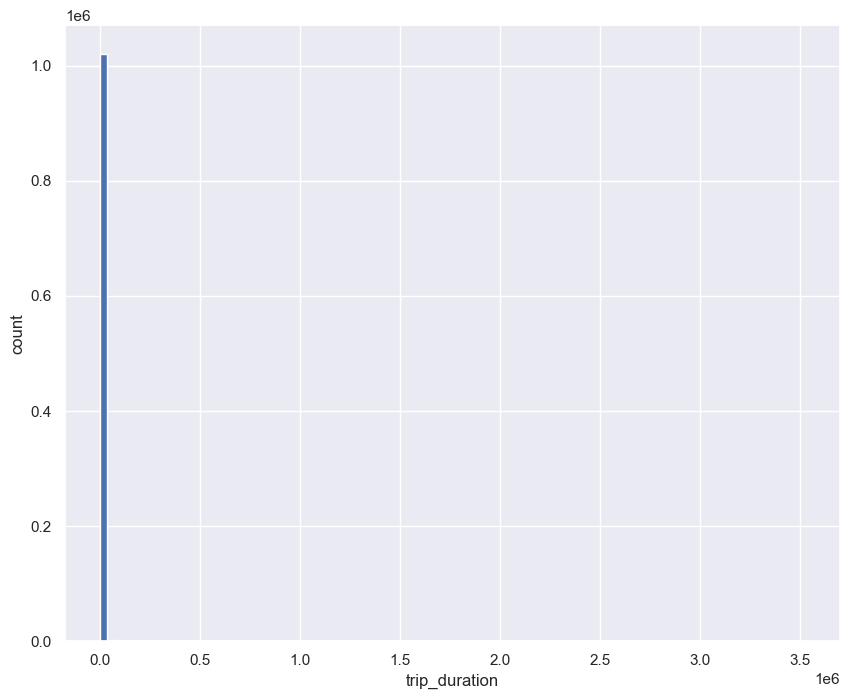

In [85]:
plt.hist(train['trip_duration'], bins=100)
plt.xlabel('trip_duration')
plt.ylabel('count')
plt.show()

In [86]:
train = train[(train['trip_duration'] < train['trip_duration'].quantile(0.90))]

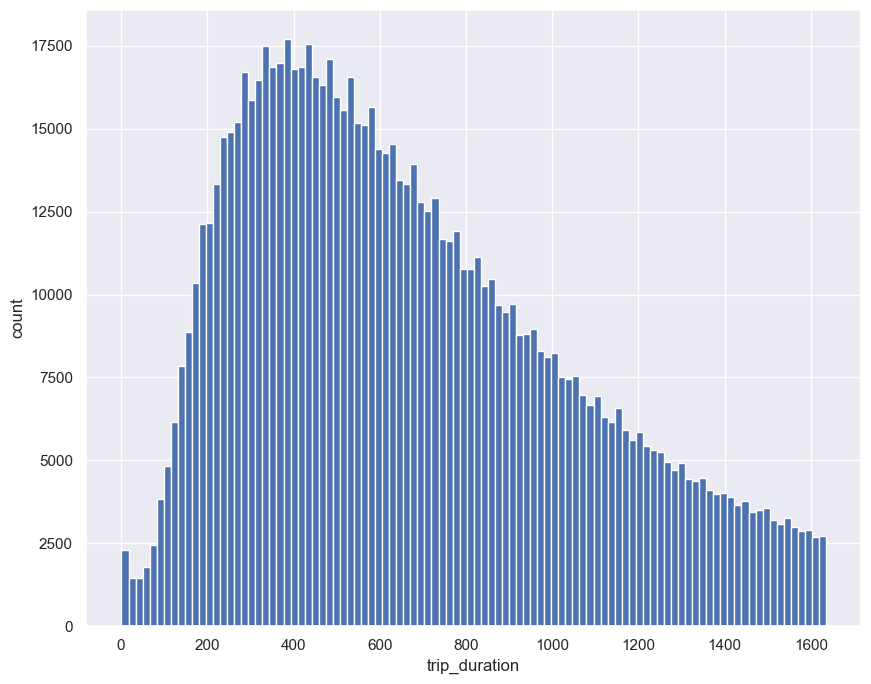

In [87]:
plt.hist(train['trip_duration'], bins=100)
plt.xlabel('trip_duration')
plt.ylabel('count')
plt.show()

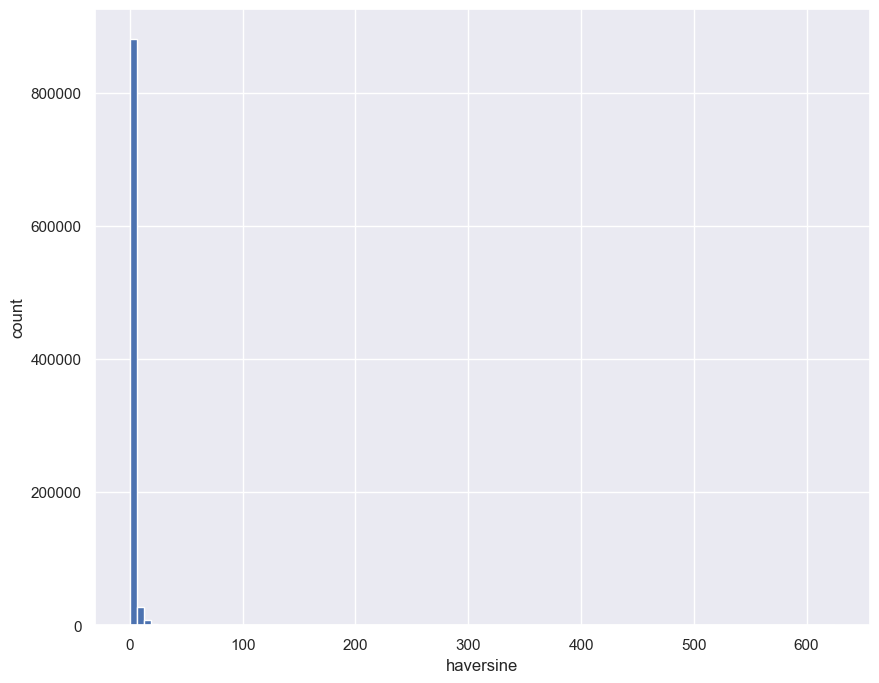

In [88]:
plt.hist(train['haversine'], bins=100)
plt.xlabel('haversine')
plt.ylabel('count')
plt.show()

In [89]:
train = train[(train['haversine'] < train['haversine'].quantile(0.90))]

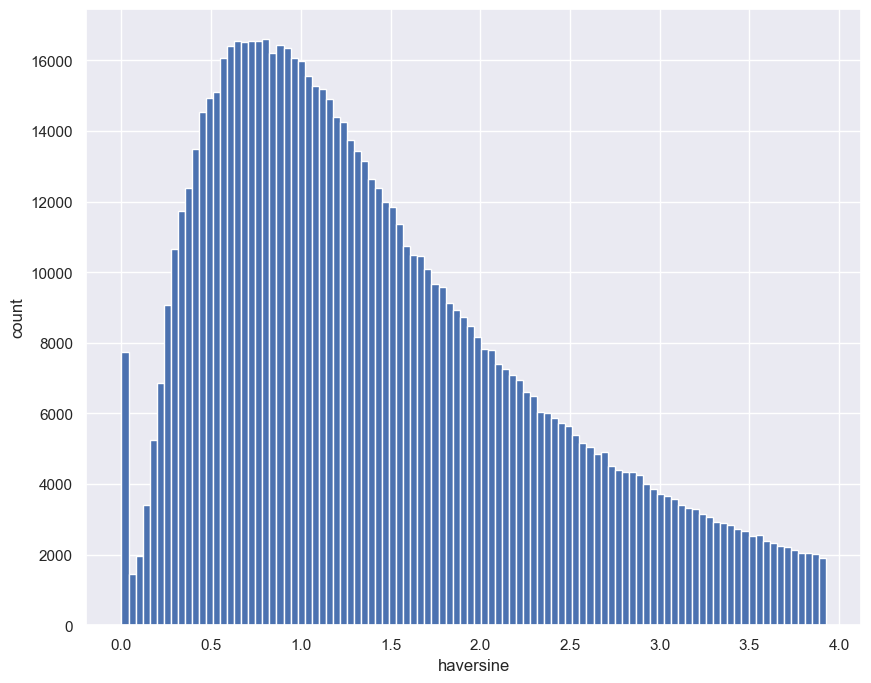

In [90]:
plt.hist(train['haversine'], bins=100)
plt.xlabel('haversine')
plt.ylabel('count')
plt.show()

In [91]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_anomal', 'log_haversine', 'airport_start', 'airport_finish', 'free_roads', 'grid_first', 'grid_second', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_anomal', 'log_haversine', 'airport_start', 'airport_finish', 'free_roads', 'grid_first', 'grid_second', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [92]:
categorical_feats = ['hour', 'day_of_week','month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second', 'vendor_id','store_and_fwd_flag']
numeric_feats = ['day_of_year', 'log_haversine', 'is_anomal', 'free_roads', 'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_feats),
    ('scaling', StandardScaler(), numeric_feats)
])#класс ColumnTransformer для своей группы признаков свою трансформацию/название трансформатора 
#класс, который это делает и группа признаков, к которой мы это применяем

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5715
Test MSE = 0.3266
Train RMSE = 0.5122
Train MSE = 0.2623
